In [1]:
import matplotlib.pyplot as plt
from util import segmentation, heterochromatin
from skimage import io

C:\Users\yuan_l\Anaconda3\envs\image_py3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filename = "old load 5.nd2"

In [3]:
img = segmentation.read_nd2_3D(filename)

In [4]:
img.metadata['pixel_microns']

0.2999423597501153

In [5]:
img_mask = segmentation.segmentation_nucleus_otsu_3D(img,\
        img_pixel_microns=0.3,arg_nucleus_diameter_micron=10)

E:\PSI-backup\2022-08 Hui heterochromatin\util\segmentation.py:98: RuntimeWarning: invalid value encountered in divide
  saturation_mask = 1.0*saturated_area/cc_area >0.1


In [6]:
img_feature = heterochromatin.extract_heterochromatin_feature_3D(img,img_mask)

In [7]:
# save features and segmented mask i
img_feature.to_csv(filename.rsplit('.', 1)[0]+"_heterochromatin.csv")
io.imsave(filename.rsplit('.', 1)[0] +'_label_3D.tif',img_mask.astype('uint16'))

C:\Users\yuan_l\AppData\Local\Temp\ipykernel_3336\2740475831.py:3: UserWarning: old load 5_label_3D.tif is a low contrast image
  io.imsave(filename.rsplit('.', 1)[0] +'_label_3D.tif',img_mask.astype('uint16'))


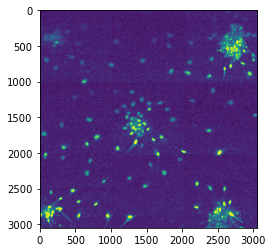

In [8]:
plt.imshow(img[round(img.shape[0]/2),:,:]>10)

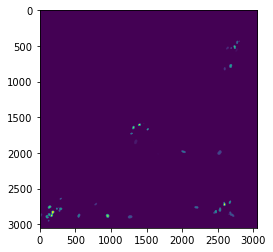

In [9]:
plt.imshow(img_mask[round(img_mask.shape[0]/2),:,:])

In [10]:
img_feature

,label,i80_i20,nhigh_nlow,hc_area_ec_area,hc_area_nuc_area,hc_content_ec_content,hc_content_dna_content
0,1,2.886792,0.999039,0.178060,0.152026,0.434642,0.302962
1,2,2.865031,0.994585,0.183999,0.156105,0.447016,0.308923
2,3,3.126263,0.999397,0.194995,0.163990,0.485514,0.326832
3,4,3.380953,1.000000,0.171231,0.147842,0.476923,0.322917
4,5,3.076271,0.997564,0.185239,0.157373,0.454838,0.312638
...,...,...,...,...,...,...,...
82,83,3.271084,0.990557,0.182044,0.154837,0.491614,0.329585
83,84,3.263682,0.996901,0.195140,0.163788,0.509623,0.337583
84,85,2.849711,0.999339,0.189891,0.160181,0.449222,0.309974
85,86,2.904829,1.007725,0.184692,0.156824,0.449567,0.310139
